In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Importing data

In [40]:
df=pd.read_csv('/Users/kenzagoumeziane/Downloads/dataset_diabetes/diabetic_data.csv')

#Dropping columns with more than 40% of missing values
df.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)

#Retriving the index of the row where all 3(diag_1,diag_2 & diag_3) values are missing and storing it in drop_Idx set.
drop_Idx=set(df[(df['diag_1']=='?') & (df['diag_2']=='?') & (df['diag_3']=='?')].index)

#Retriving the index of the rows where only diag_1 value is missing and appending the same in drop_idx set.
drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))

#Retriving the index of the rows where only diag_2 value is missing and appending the same in drop_idx set.
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))

#Retriving the index of the rows where only diag_3 value is missing and appending the same in drop_idx set.
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))

#Retriving the index of the rows where only race value is missing and appending the same in drop_idx set.
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))

#Retriving the index of the rows where discharge_disposition_id value is 11 and appending the same in drop_idx set.
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))

#Retriving the index of the rows where gender value is'Unknown/Invalid' and appending the same in drop_idx set.
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))

#stored the final indexes in new_Idx
new_Idx=list(set(df.index)-set(drop_Idx))

#Final dataframe without missing values
df=df.iloc[new_Idx]

In [41]:
df = df[['time_in_hospital', 'num_medications']]
df.rename(columns = {'time_in_hospital':'X'}, inplace = True)
df.rename(columns = {'num_medications':'Y'}, inplace = True)
# Selecting 30 sample data points for clustering
df=df[:30]
df

,X,Y
1,3,18
2,2,13
3,2,16
4,1,8
5,3,16
6,4,21
7,5,12
8,13,28
9,12,18
10,9,17


# Scaling the data

In [42]:
scaler = StandardScaler()
df[['X','Y']] = scaler.fit_transform(df[['X','Y']])
df

,X,Y
1,-0.657267,0.398711
2,-0.934985,-0.468052
3,-0.934985,0.052006
4,-1.212703,-1.334814
5,-0.657267,0.052006
6,-0.379548,0.918768
7,-0.101830,-0.641404
8,2.119916,2.132236
9,1.842198,0.398711
10,1.009043,0.225358




---



---


#**dbscan**


## Choosing R using the NearestNeighbors

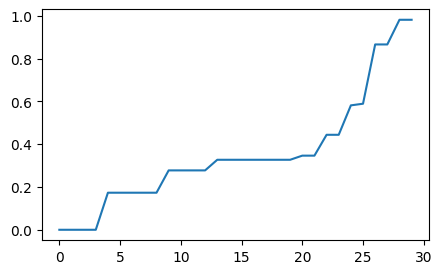

In [43]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(df[['X','Y']]) # fitting the data to the object
distances,indices=nbrs.kneighbors(df[['X','Y']]) # finding the nearest neighbours

# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

# Results using  dbscan  R=0.8 and minp=4

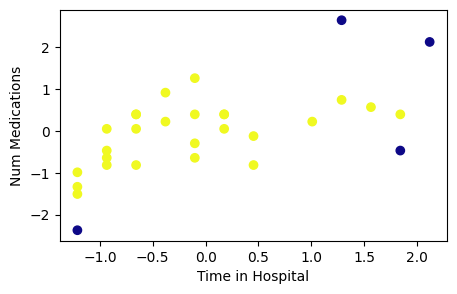

In [44]:
from sklearn.cluster import DBSCAN
# cluster the data 
dbscan = DBSCAN(eps =0.8, min_samples = 4).fit(df[['X','Y']]) # fitting the model
labels = dbscan.labels_ # getting the labels

# Plot the clusters
plt.scatter(df['X'], df['Y'], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Time in Hospital") # X-axis label
plt.ylabel("Num Medications") # Y-axis label
plt.show() # showing the plot